In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
def cosm_dir(n):
    return np.arccos((1-np.random.rand(n))**(1/3)), 2*np.pi*np.random.rand(n)

In [3]:
n = 5000000

th, ph = cosm_dir(n)
st, ct = np.sin(th), np.cos(th)
sp, cp = np.sin(ph), np.cos(ph)
us, vs, ws = st*cp, st*sp, ct

In [4]:
# piano bottom

plane_h0 = 0
plane_w0 = 0.05
plane_l0 = 0.05

x0s = np.random.rand(n)*plane_w0-plane_w0/2
y0s = np.random.rand(n)*plane_l0-plane_l0/2
z0s = np.full(n, plane_h0)

In [19]:
# piano top
offset = 0#0.132


plane_h1 = 0.05
plane_w1 = 0.05
plane_l1 = 0.05

x1s = x0s + plane_h1*us/ws
y1s = y0s + plane_h1*vs/ws
z1s = np.full(n,plane_h1)

hits1 = ((-plane_w1/2 + offset) < x1s) & (x1s < (plane_w1/2 + offset)) & (-plane_l1/2 < y1s) & (y1s < plane_l1/2)

In [20]:
np.sum(hits1)/len(hits1)

0.2719796

In [21]:
rate = 25/60.

In [22]:
np.sum(hits1)/len(hits1) * rate

0.11332483333333333

In [23]:
np.sum(hits1)/len(hits1) * rate * 3600

407.9694

In [17]:
1 / (np.sum(hits1)/len(hits1) * rate)

712.5044531528322

(array([[  2873.,   4676.,   7315.,  10097.,  11908.,  12159.,  10300.,
           7194.,   4600.,   2917.],
        [  4703.,   8545.,  15036.,  23465.,  29768.,  29949.,  23095.,
          15118.,   8587.,   4539.],
        [  7277.,  14922.,  30303.,  53664.,  73388.,  73577.,  53855.,
          30283.,  14858.,   7225.],
        [ 10149.,  23443.,  53842., 106399., 155560., 155610., 106744.,
          53854.,  23298.,  10221.],
        [ 12076.,  29672.,  74078., 156442., 234166., 233791., 157102.,
          73823.,  29450.,  12144.],
        [ 11962.,  29687.,  74039., 156112., 233968., 233832., 155784.,
          74037.,  29609.,  12021.],
        [ 10076.,  23257.,  54069., 106947., 155990., 155266., 107130.,
          54070.,  23297.,  10259.],
        [  7309.,  15146.,  30546.,  53580.,  73985.,  73818.,  53647.,
          30534.,  15031.,   7221.],
        [  4720.,   8500.,  14952.,  23506.,  29456.,  29583.,  23304.,
          14971.,   8613.,   4542.],
        [  2895.,  

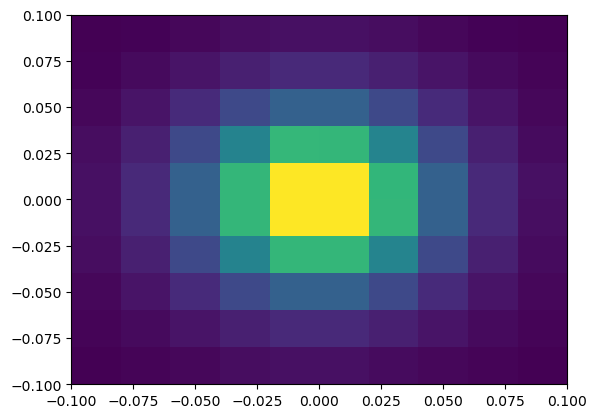

In [13]:
plt.hist2d(x1s,y1s, range = [(-0.1, 0.1),(-0.1,0.1)])

In [6]:
# piano DUT

plane_h2 = 1
plane_w2 = 0.1
plane_l2 = 0.1

x2s = x0s + plane_h2*us/ws
y2s = y0s + plane_h2*vs/ws
z2s = np.full(n,plane_h2)

hits2= (-plane_w2/2 < x2s) & (x2s < plane_w2/2) & (-plane_l2/2 < y2s) & (y2s < plane_l2/2)

In [7]:
hits1and2 = hits1*hits2

In [8]:
inc_rate = 10000/60 # a m2
ntracks_acc=len(hits1[hits1==True])
tot_rate_acc = inc_rate/n*ntracks_acc
ntracks_dut=len(hits1and2[hits1and2==True])
dut_rate = inc_rate/n*ntracks_dut
ntracks_dut_err=np.sqrt(ntracks_dut)
print(f'traccie in accettanza camere: {ntracks_acc}')
print(f'traccie in accettanza camere e DUT: {ntracks_dut} +/- {ntracks_dut_err:0.1f}')
print(f'frazione traccie in accettanza camere e DUT: ({ntracks_dut/ntracks_acc*100:.2f} +/- {ntracks_dut_err/ntracks_acc*100:.2f}) % \n')

print(f'rate in accettanza camere: {tot_rate_acc:.2f} Hz ')
print(f'rate in accettanza camere e DUT (10cm^2 @ h = 1m): {dut_rate:.2f} Hz \n')


traccie in accettanza camere: 356267
traccie in accettanza camere e DUT: 4144 +/- 64.4
frazione traccie in accettanza camere e DUT: (1.16 +/- 0.02) % 

rate in accettanza camere: 11.88 Hz 
rate in accettanza camere e DUT (10cm^2 @ h = 1m): 0.14 Hz 



In [14]:
#%matplotlib notebook
%matplotlib widget

import mpld3

import mpl_toolkits.mplot3d as a3
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 100)

nmax = 10000
x0max, y0max, z0max = x0s[:nmax], y0s[:nmax], z0s[:nmax]
x1max, y1max, z1max = x1s[:nmax], y1s[:nmax], z1s[:nmax]
x2max, y2max, z2max = x2s[:nmax], y2s[:nmax], z2s[:nmax]
umax, vmax, wmax = us[:nmax], vs[:nmax], ws[:nmax]
hitmax1 = hits1[:nmax]
hitmax2 = hits2[:nmax]
hitmax1and2 = hits1and2[:nmax]
#colors = ['red' if hit else 'cornflowerblue' for hit in hitmax1]

#ax.quiver(x0max, y0max, z0max, umax, vmax, wmax, length=2, arrow_length_ratio=0, normalize=True, color=colors, alpha=0.4)
#ax.quiver(x0max[hitmax1], y0max[hitmax1], z0max[hitmax1], umax[hitmax1], vmax[hitmax1], wmax[hitmax1], length=2, arrow_length_ratio=0, normalize=True, color='green',  alpha=0.4)
ax.quiver(x0max[hitmax1*hitmax2], y0max[hitmax1*hitmax2], z0max[hitmax1*hitmax2], umax[hitmax1*hitmax2], vmax[hitmax1*hitmax2], wmax[hitmax1*hitmax2], length=plane_h1, arrow_length_ratio=0, normalize=True, color='red',  alpha=0.4)

#ax.scatter(x0max[hitmax1], y0max[hitmax1], z0max[hitmax1], s=1, color='green')
#ax.scatter(x1max[hitmax1], y1max[hitmax1], z1max[hitmax1], s=1, color='green')

ax.scatter(x0max[hitmax1and2], y0max[hitmax1and2], z0max[hitmax1and2], s=2, color='red')
ax.scatter(x1max[hitmax1and2], y1max[hitmax1and2], z1max[hitmax1and2], s=2, color='red')

ax.scatter(x2max[hitmax1and2], y2max[hitmax1and2], z2max[hitmax1and2], s=4, color='red')

#ax.set_xlim3d(-plane_wu/2, plane_wu/2)
#ax.set_ylim3d(-plane_lu/2, plane_lu/2)
#ax.set_zlim3d(plane_hu, plane_h2)



plane_vtx_0=np.array([[-plane_w0/2,-plane_l0/2,plane_h0], [plane_w0/2,-plane_l0/2,plane_h0], [plane_w0/2,plane_l0/2,plane_h0], [-plane_w0/2,plane_l0/2,plane_h0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx_0])
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)

plane_vtx_1=np.array([[-plane_w1/2,-plane_l1/2,plane_h1], [plane_w1/2,-plane_l1/2,plane_h1], [plane_w1/2,plane_l1/2,plane_h1], [-plane_w1/2,plane_l1/2,plane_h1]])
plane1 = a3.art3d.Poly3DCollection([plane_vtx_1])
plane1.set_color('#0000ff20')
plane1.set_edgecolor('#0000ff')
ax.add_collection3d(plane1)

plane_vtx_2=np.array([[-plane_w2/2,-plane_l2/2,plane_h2], [plane_w2/2,-plane_l2/2,plane_h2], [plane_w2/2,plane_l2/2,plane_h2], [-plane_w2/2,plane_l2/2,plane_h2]])
plane2 = a3.art3d.Poly3DCollection([plane_vtx_2])
plane2.set_color('#0000ff20')
plane2.set_edgecolor('#0000ff')
ax.add_collection3d(plane2)



plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

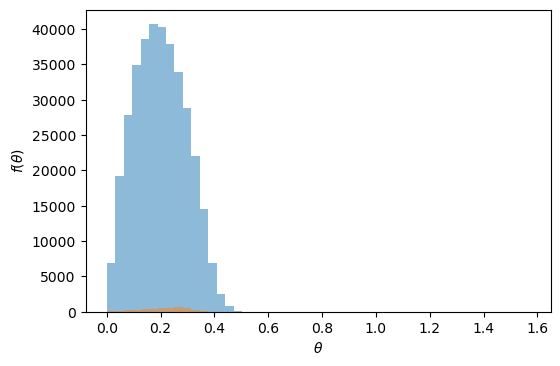

In [10]:
%matplotlib inline
plt.figure(figsize=(6,4),dpi=100)
theta_range=[0,math.pi/2]
plt.hist(th[hits1],density=False,bins=50,range=theta_range, alpha=0.5)
plt.hist(th[hits1and2],density=False,bins=50,range=theta_range, alpha=0.5)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.show()

# Variando altezza top


In [18]:
# piano bottom

AL = np.linspace(3,1, 21)

NA=[]
RA=[]
ND=[]
RD=[]

    

for j in AL:
    
    plane_h0 = 0
    plane_w0 = 1.34
    plane_l0 = 1.34

    x0s = np.random.rand(n)*plane_w0-plane_w0/2
    y0s = np.random.rand(n)*plane_l0-plane_l0/2
    z0s = np.full(n, plane_h0)

    # piano top

    plane_h1 = j
    plane_w1 = 1.34
    plane_l1 = 1.34

    x1s = x0s + plane_h1*us/ws
    y1s = y0s + plane_h1*vs/ws
    z1s = np.full(n,plane_h1)

    hits1 = (-plane_w1/2 < x1s) & (x1s < plane_w1/2) & (-plane_l1/2 < y1s) & (y1s < plane_l1/2)

    # piano DUT

    plane_h2 = 1
    plane_w2 = 0.1
    plane_l2 = 0.1

    x2s = x0s + plane_h2*us/ws
    y2s = y0s + plane_h2*vs/ws
    z2s = np.full(n,plane_h2)

    hits2= (-plane_w2/2 < x2s) & (x2s < plane_w2/2) & (-plane_l2/2 < y2s) & (y2s < plane_l2/2)

    hits1and2 = hits1*hits2

    inc_rate = 10000/60 # a m2
    ntracks_acc=len(hits1[hits1==True])
    tot_rate_acc = inc_rate/n*ntracks_acc
    ntracks_dut=len(hits1and2[hits1and2==True])
    dut_rate = inc_rate/n*ntracks_dut

    NA+=[ntracks_acc]
    RA+=[tot_rate_acc]
    ND+=[ntracks_dut]
    RD+=[dut_rate]


Text(0.5, 0, 'top scint. altitude')

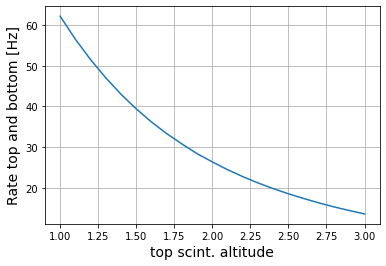

In [19]:
%matplotlib inline
plt.plot(AL, RA)
plt.grid()
plt.ylabel('Rate top and bottom [Hz]', size=14)
plt.xlabel('top scint. altitude', size=14)

Text(0.5, 0, 'top scint. altitude')

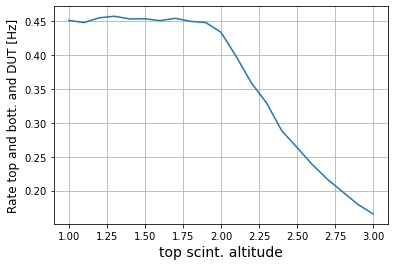

In [20]:
%matplotlib inline
plt.plot(AL, RD)
plt.grid()
plt.ylabel('Rate top and bott. and DUT [Hz]', size=12)
plt.xlabel('top scint. altitude', size=14)

# Variando altezza DUT

In [21]:
# piano bottom

AL = np.linspace(3,0, 31)

NA=[]
RA=[]
ND=[]
RD=[]

    

for j in AL:
    
    plane_h0 = 0
    plane_w0 = 1.34
    plane_l0 = 1.34

    x0s = np.random.rand(n)*plane_w0-plane_w0/2
    y0s = np.random.rand(n)*plane_l0-plane_l0/2
    z0s = np.full(n, plane_h0)

    # piano top

    plane_h1 = 3.25
    plane_w1 = 1.34
    plane_l1 = 1.34

    x1s = x0s + plane_h1*us/ws
    y1s = y0s + plane_h1*vs/ws
    z1s = np.full(n,plane_h1)

    hits1 = (-plane_w1/2 < x1s) & (x1s < plane_w1/2) & (-plane_l1/2 < y1s) & (y1s < plane_l1/2)

    # piano DUT

    plane_h2 = j
    plane_w2 = 0.1
    plane_l2 = 0.1

    x2s = x0s + plane_h2*us/ws
    y2s = y0s + plane_h2*vs/ws
    z2s = np.full(n,plane_h2)

    hits2= (-plane_w2/2 < x2s) & (x2s < plane_w2/2) & (-plane_l2/2 < y2s) & (y2s < plane_l2/2)

    hits1and2 = hits1*hits2

    inc_rate = 10000/60 # a m2
    ntracks_acc=len(hits1[hits1==True])
    tot_rate_acc = inc_rate/n*ntracks_acc
    ntracks_dut=len(hits1and2[hits1and2==True])
    dut_rate = inc_rate/n*ntracks_dut

    NA+=[ntracks_acc]
    RA+=[tot_rate_acc]
    ND+=[ntracks_dut]
    RD+=[dut_rate]


Text(0.5, 0, 'DUT scint. altitude')

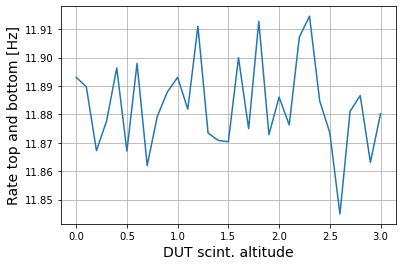

In [22]:
%matplotlib inline
plt.plot(AL, RA)
plt.grid()
plt.ylabel('Rate top and bottom [Hz]', size=14)
plt.xlabel('DUT scint. altitude', size=14)

Text(0.5, 0, 'DUT scint. altitude')

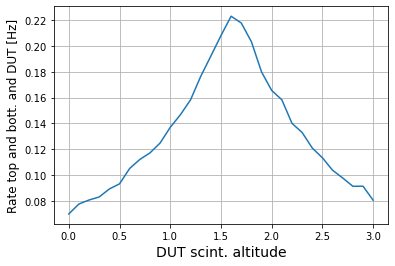

In [23]:
%matplotlib inline
plt.plot(AL, RD)
plt.grid()
plt.ylabel('Rate top and bott. and DUT [Hz]', size=12)
plt.xlabel('DUT scint. altitude', size=14)

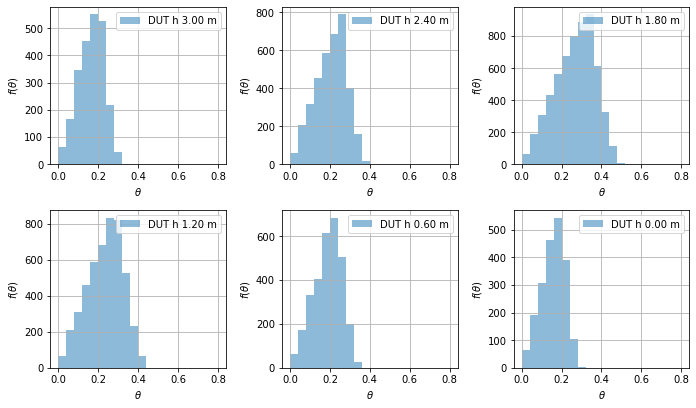

In [39]:
# piano bottom

AL = np.linspace(3,0, 6)

plots_per_row=3
FRAMES=AL
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 6))
fig.tight_layout(pad=2.5)
    
i=0
j=0

NA=[]
RA=[]
ND=[]
RD=[]

    
theta_range=[0,math.pi/2]
    
for al in AL:
    
    plane_h0 = 0
    plane_w0 = 1.34
    plane_l0 = 1.34

    x0s = np.random.rand(n)*plane_w0-plane_w0/2
    y0s = np.random.rand(n)*plane_l0-plane_l0/2
    z0s = np.full(n, plane_h0)

    # piano top

    plane_h1 = 3.25
    plane_w1 = 1.34
    plane_l1 = 1.34

    x1s = x0s + plane_h1*us/ws
    y1s = y0s + plane_h1*vs/ws
    z1s = np.full(n,plane_h1)

    hits1 = (-plane_w1/2 < x1s) & (x1s < plane_w1/2) & (-plane_l1/2 < y1s) & (y1s < plane_l1/2)

    # piano DUT

    plane_h2 = al
    plane_w2 = 0.1
    plane_l2 = 0.1

    x2s = x0s + plane_h2*us/ws
    y2s = y0s + plane_h2*vs/ws
    z2s = np.full(n,plane_h2)

    hits2= (-plane_w2/2 < x2s) & (x2s < plane_w2/2) & (-plane_l2/2 < y2s) & (y2s < plane_l2/2)

    hits1and2 = hits1*hits2

    inc_rate = 10000/60 # a m2
    ntracks_acc=len(hits1[hits1==True])
    tot_rate_acc = inc_rate/n*ntracks_acc
    ntracks_dut=len(hits1and2[hits1and2==True])
    dut_rate = inc_rate/n*ntracks_dut

    NA+=[ntracks_acc]
    RA+=[tot_rate_acc]
    ND+=[ntracks_dut]
    RD+=[dut_rate]
    
    #plt.figure()#figsize=(6,4),dpi=100)
    #plt.hist(th[hits1and2], bins=20, range=[0, 0.8], histtype ='step', label=f'DUT altitide {j:.2f} m') 
    #plt.legend()
    #plt.xlabel(r'$\theta$')
    #plt.ylabel(r'$f(\theta)$')
    #plt.show()

    
    


    axs[i][j].hist(th[hits1and2], bins=20, range=[0, 0.8], alpha=0.5, label=f'DUT h {al:.2f} m') 
    axs[i][j].set_xlabel(r'$\theta$')#, size=14)
    axs[i][j].set_ylabel(r'$f(\theta)$')#, size=14)
    axs[i][j].grid()
    axs[i][j].legend()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
        
plt.show()


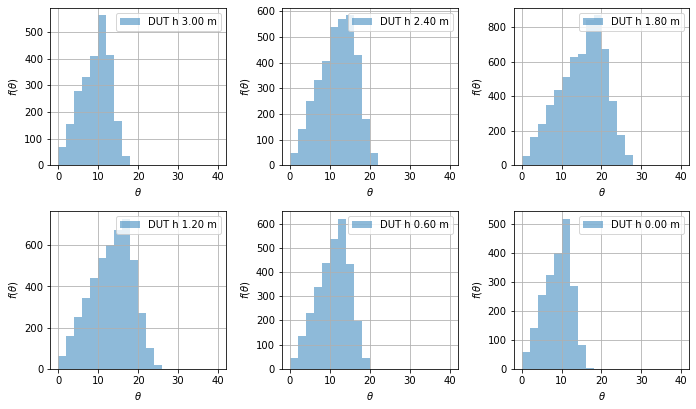

In [40]:
# piano bottom

AL = np.linspace(3,0, 6)

plots_per_row=3
FRAMES=AL
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 6))
fig.tight_layout(pad=2.5)
    
i=0
j=0

NA=[]
RA=[]
ND=[]
RD=[]

    
theta_range=[0,math.pi/2]
    
for al in AL:
    
    plane_h0 = 0
    plane_w0 = 1.34
    plane_l0 = 1.34

    x0s = np.random.rand(n)*plane_w0-plane_w0/2
    y0s = np.random.rand(n)*plane_l0-plane_l0/2
    z0s = np.full(n, plane_h0)

    # piano top

    plane_h1 = 3.25
    plane_w1 = 1.34
    plane_l1 = 1.34

    x1s = x0s + plane_h1*us/ws
    y1s = y0s + plane_h1*vs/ws
    z1s = np.full(n,plane_h1)

    hits1 = (-plane_w1/2 < x1s) & (x1s < plane_w1/2) & (-plane_l1/2 < y1s) & (y1s < plane_l1/2)

    # piano DUT

    plane_h2 = al
    plane_w2 = 0.1
    plane_l2 = 0.1

    x2s = x0s + plane_h2*us/ws
    y2s = y0s + plane_h2*vs/ws
    z2s = np.full(n,plane_h2)

    hits2= (-plane_w2/2 < x2s) & (x2s < plane_w2/2) & (-plane_l2/2 < y2s) & (y2s < plane_l2/2)

    hits1and2 = hits1*hits2

    inc_rate = 10000/60 # a m2
    ntracks_acc=len(hits1[hits1==True])
    tot_rate_acc = inc_rate/n*ntracks_acc
    ntracks_dut=len(hits1and2[hits1and2==True])
    dut_rate = inc_rate/n*ntracks_dut

    NA+=[ntracks_acc]
    RA+=[tot_rate_acc]
    ND+=[ntracks_dut]
    RD+=[dut_rate]
    
    #plt.figure()#figsize=(6,4),dpi=100)
    #plt.hist(th[hits1and2], bins=20, range=[0, 0.8], histtype ='step', label=f'DUT altitide {j:.2f} m') 
    #plt.legend()
    #plt.xlabel(r'$\theta$')
    #plt.ylabel(r'$f(\theta)$')
    #plt.show()

    
    


    axs[i][j].hist(th[hits1and2]/3.14*180, bins=20, range=[0, 40], alpha=0.5, label=f'DUT h {al:.2f} m') 
    axs[i][j].set_xlabel(r'$\theta$')#, size=14)
    axs[i][j].set_ylabel(r'$f(\theta)$')#, size=14)
    axs[i][j].grid()
    axs[i][j].legend()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
        
plt.show()


In [28]:
#%matplotlib widget

